In [1]:
import projection
import numpy as np
import plot
from plot import plot_mass
import matplotlib.pyplot as plt
import read_chroma
import mass_spec
from pyteomics import mzml, auxiliary
from skimage.feature import peak_local_max
import time
import peak_detection
import benchmark
import matching
from matchms.importing import load_from_mgf
import utils
import importlib


# Plot file

In [92]:
filename = "data/G0-1-250123.cdf"
mod_time = 1.25
chromato_obj = read_chroma.read_chroma(filename, mod_time)
chromato,time_rn,spectra_obj = chromato_obj
full_spectra = mass_spec.read_full_spectra(spectra_obj=spectra_obj)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

In [93]:
spectra, debuts, fins = full_spectra
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)

0
461


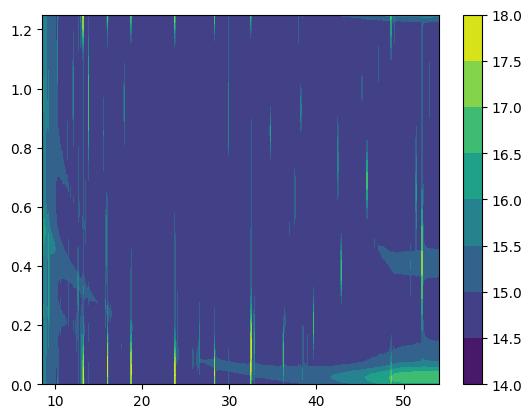

In [94]:
plot.visualizer(chromato_obj=(chromato,time_rn), mod_time=1.25)

In [100]:
importlib.reload(peak_detection)
u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.05, mode="tic", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.1))
r=None

In [101]:
len(u)

2146

In [102]:
u

array([[ 734,    4],
       [ 229,    2],
       [ 362,    7],
       ...,
       [ 188,   60],
       [1915,  106],
       [1857,   68]], dtype=int64)

In [103]:
importlib.reload(matching)
matches = matching.matching_nist_lib(chromato_obj=chromato_obj, spectra=spectra, coordinates=u)

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Caprylic acid, �-methyl-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Stearic acid, �-methyl-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Stearic acid, �-bromo-, O-TMS: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_sea

In [104]:
chromato_cd = projection.matrix_to_chromato(u,time_rn, mod_time,chromato.shape)

c:\Users\Stan\pic\plot.py:110: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:110: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


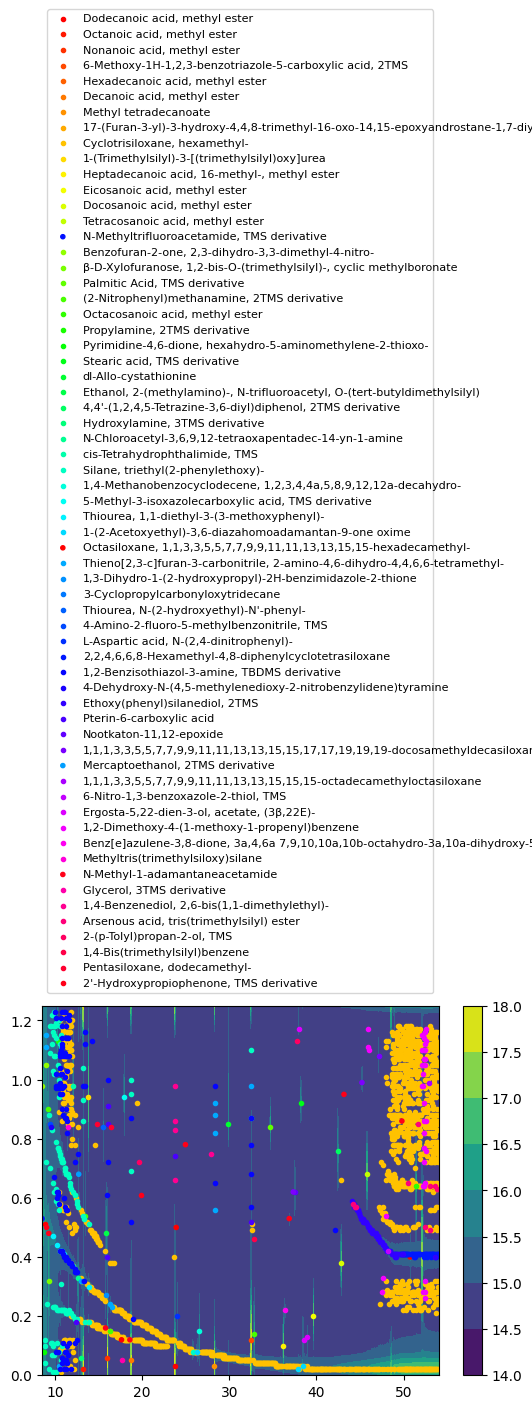

In [105]:
importlib.reload(utils)
casnos_dict = (utils.get_name_dict(matches))
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=chromato_cd, casnos_dict=casnos_dict)

# Plot zoom mass nm, centroid and profile

## Read mzml profile

In [20]:
filename_profile = "F:/Bureau/Nouveau dossier/751301_YBS8_J0-mzml-profil.mzML"
reader = mzml.MzML(filename_profile)


## Plot

(39.5, 40.5)

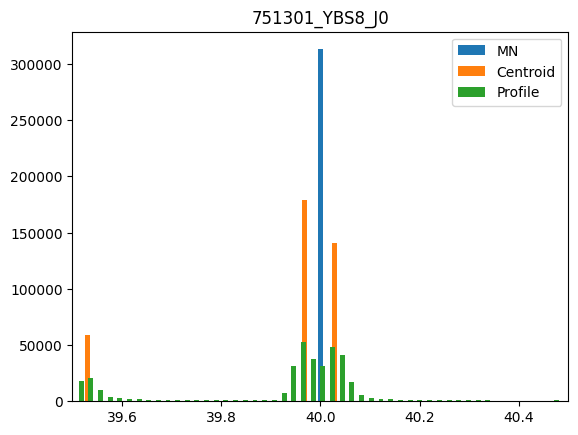

In [125]:
mod_time = 1.25
filename_nm,filename_centroid= "F:/Bureau/Nouveau dossier/751301_YBS8_J0-CDF-nominal-mass.cdf", "F:/Bureau/Nouveau dossier/751301_YBS8_J0-CDF-centroid.cdf"

chromato_obj_nm = read_chroma(filename_nm, mod_time)
chromato_nm,time_rn,spectra_obj_nm = chromato_obj_nm
spectra_nm,debuts,fins = mass_spec.read_spectra(spectra_obj_nm)

#centroid
chromato_obj_centroid = read_chroma(filename_centroid, mod_time)
chromato_centroid,time_rn,spectra_obj_centroid = chromato_obj_centroid
spectra_centroid,debuts,fins = mass_spec.read_spectra_centroid(spectra_obj_centroid)


coord = projection.chromato_to_matrix(np.array([[6.73, 0.24]]), time_rn=time_rn, mod_time=mod_time, chromato_dim=chromato_nm.shape)
coord = coord[0]

mass_values_profile, int_values_profile = reader[68798]['m/z array'], reader[68798]['intensity array']

m= 40
mass_values_nm, int_values_nm = mass_spec.read_spectrum(chromato_nm, coord, spectra_nm)
ind_nm = np.where(mass_values_nm >= (m+1))[0][0]
ind_nb_g = np.where(mass_values_nm > (m-1))[0][0]
#centroid
mass_values_centroid, int_values_centroid = mass_spec.read_spectrum(chromato_centroid, coord, spectra_centroid)
ind_centroid = np.where(mass_values_centroid >  (m+0.5) )[0][0]
ind_centroid_g = np.where(mass_values_centroid > (m-0.5))[0][0]

tmp = reader[68798]
mass_values_profile, int_values_profile = tmp['m/z array'], tmp['intensity array']
ind_profile = np.where(mass_values_profile >  (m+0.5))[0][0]
ind_profile_g = np.where(mass_values_profile > (m-0.5))[0][0]

plt.bar(mass_values_nm[ind_nb_g:ind_nm], int_values_nm[ind_nb_g:ind_nm], width=0.01, label ='MN')
plt.bar(mass_values_centroid[ind_centroid_g:ind_centroid], int_values_centroid[ind_centroid_g:ind_centroid], width=0.01, label ='Centroid')
plt.bar(mass_values_profile[ind_profile_g:ind_profile], int_values_profile[ind_profile_g:ind_profile], width=0.01, label ='Profile')
plt.legend()
plt.title("751301_YBS8_J0")

plt.xlim([m-0.5, m+0.5])

In [111]:
(int_values_nm[ind_nb_g:ind_nm] - np.sum(int_values_profile[ind_profile_g:ind_profile]))/int_values_nm[ind_nb_g:ind_nm]

masked_array(data=[0.07549403607845306],
             mask=[False],
       fill_value=1e+20,
            dtype=float32)

# Test 3D detection

In [266]:
import importlib
importlib.reload(mass_spec)
importlib.reload(read_chroma)
importlib.reload(plot)
importlib.reload(benchmark)
importlib.reload(peak_detection)
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\33631\\Desktop\\stage\\pic\\utils.py'>

In [228]:
filename = "data/G0-1-250123.cdf"
mod_time = 1.25

In [229]:
chromato_obj = read_chroma.read_chroma(filename, mod_time)
chromato,time_rn,spectra_obj = chromato_obj

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

In [230]:
full_spectra = mass_spec.read_full_spectra(spectra_obj=spectra_obj)

(328125, 2)
--- 37.13889455795288 seconds --- to compute full spectra


In [231]:
spectra, debuts, fins = full_spectra

In [232]:
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)

0
461


In [233]:
chromato_cube.shape

(462, 2187, 150)

In [275]:
import importlib
importlib.reload(mass_spec)
importlib.reload(read_chroma)
importlib.reload(plot)
importlib.reload(benchmark)
importlib.reload(peak_detection)
importlib.reload(utils)
importlib.reload(matching)

<module 'matching' from 'c:\\Users\\33631\\Desktop\\stage\\pic\\matching.py'>

In [374]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel

In [375]:
import scipy


u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.1, mode="3D", chromato_cube=sobel(chromato_cube), cluster=True, threshold_abs=(0.024))
r=None

c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [376]:
len(u)

191

In [377]:
v = projection.matrix_to_chromato(u, time_rn, mod_time, chromato.shape)

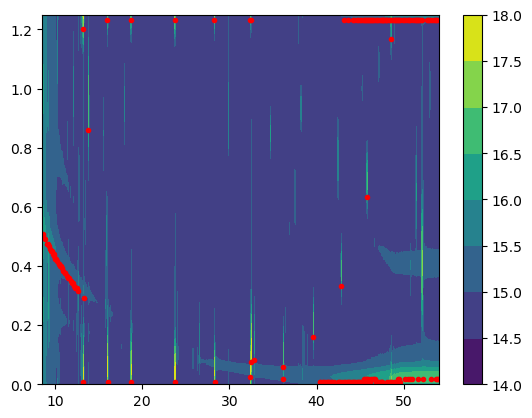

In [378]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=v, radius=r)

In [379]:
spectrum_path, lib_path = "./myspectra.mgf", "./my_lib.mgf"

In [380]:
spectrum_lib = list(load_from_mgf(lib_path, metadata_harmonization=False))

In [381]:
importlib.reload(mass_spec)
matches = matching.matching(chromato_obj, spectra, spectrum_path,
                    spectrum_lib, u, mod_time=mod_time, min_score = 0.7)

In [382]:
len(matches)

167

In [383]:
matches

[[[10.98, 0.38],
  {'casno': '55012-80-1',
   'compound_name': 'Silane, trimethyl[5-methyl-2-(1-methylethyl)phenoxy]-'},
  (0.70283583, 128),
  {'casno': '110-62-3', 'compound_name': 'Pentanal'},
  (0.41973274, 19),
  {'casno': '590-86-3', 'compound_name': 'Butanal, 3-methyl-'},
  (0.37911123, 36)],
 [[11.12, 0.38],
  {'casno': '55012-80-1',
   'compound_name': 'Silane, trimethyl[5-methyl-2-(1-methylethyl)phenoxy]-'},
  (0.71217899, 128),
  {'casno': '110-62-3', 'compound_name': 'Pentanal'},
  (0.41707213, 19),
  {'casno': '590-86-3', 'compound_name': 'Butanal, 3-methyl-'},
  (0.37403912, 36)],
 [[11.2, 0.38],
  {'casno': '55012-80-1',
   'compound_name': 'Silane, trimethyl[5-methyl-2-(1-methylethyl)phenoxy]-'},
  (0.70415667, 128),
  {'casno': '110-62-3', 'compound_name': 'Pentanal'},
  (0.42493615, 19),
  {'casno': '590-86-3', 'compound_name': 'Butanal, 3-methyl-'},
  (0.38313896, 36)],
 [[11.39, 0.37],
  {'casno': '55012-80-1',
   'compound_name': 'Silane, trimethyl[5-methyl-2-(1-me

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

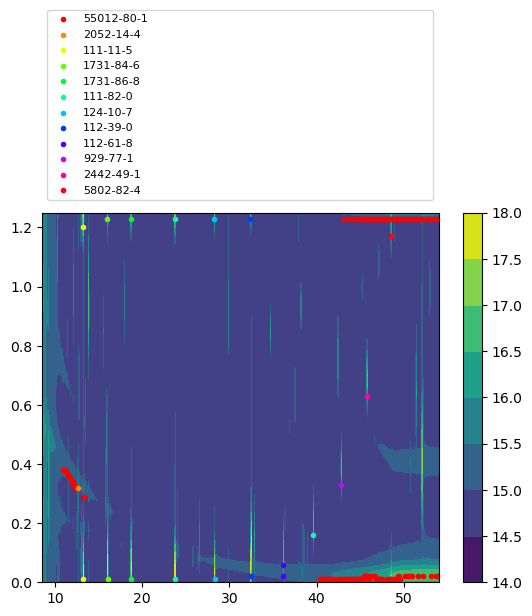

In [384]:
importlib.reload(plot)
casnos_dict = (utils.get_casno_dict(matches))
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=v, radius=r, casnos_dict=casnos_dict)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

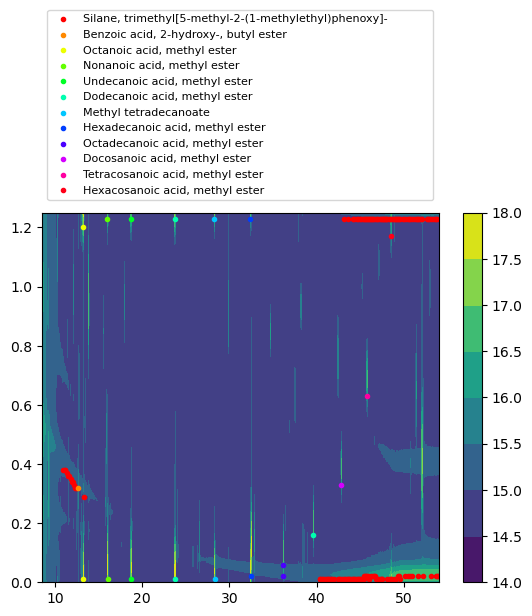

In [385]:
importlib.reload(plot)
casnos_dict = (utils.get_name_dict(matches))
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=v, radius=r, casnos_dict=casnos_dict)

# Comparaison des peaks detectés et des maximums d'intensité sur chaque coupe de masse

In [99]:
chromato.shape

(2187, 150)

In [100]:
max_per_m_slice = []
for chrom in chromato_cube:
    max_per_m_slice.append(np.argmax(chrom))
max_per_m_slice = np.array(max_per_m_slice)

In [102]:
max = np.column_stack((max_per_m_slice // chromato.shape[1], max_per_m_slice % chromato.shape[1]))

In [103]:
chromato_cube.shape

(462, 2187, 150)

In [104]:
chromato_max = projection.matrix_to_chromato(max, time_rn, mod_time, chromato.shape)

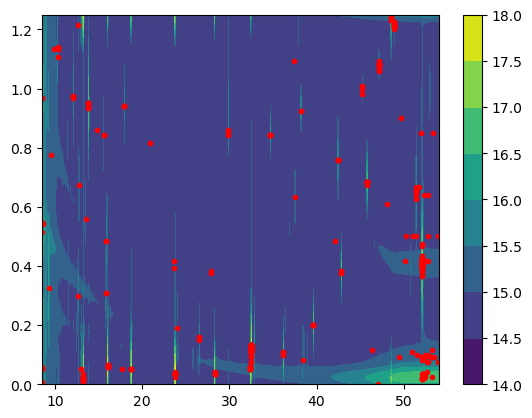

In [105]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=chromato_max)

c:\Users\33631\Desktop\stage\pic\peak_detection.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


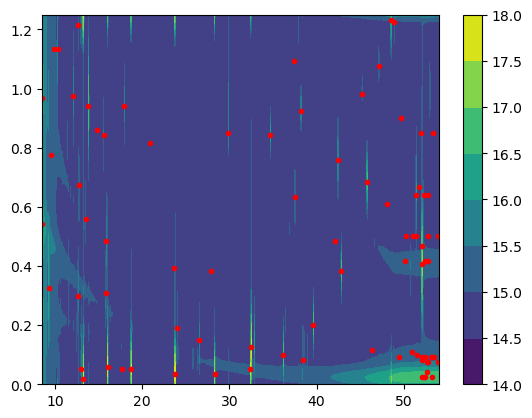

84

In [136]:
u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.99999, mode="mass_per_mass", chromato_cube=chromato_cube, cluster=True)
v = projection.matrix_to_chromato(u, time_rn, mod_time, chromato.shape)
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=v)
len(v)

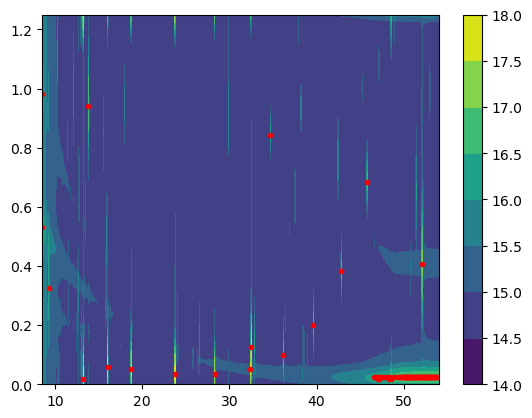

99

In [139]:
u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.2, mode="tic", chromato_cube=chromato_cube, cluster=True)
v = projection.matrix_to_chromato(u, time_rn, mod_time, chromato.shape)
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=v)
len(v)

In [134]:
ar = []
for coord in u:
    if (coord in max):
        ar.append(True)
    else:
        ar.append(False)
ar = np.array(ar)


In [135]:
print(np.unique(ar))

[ True]


In [69]:
hist_chromato = np.histogram(chromato, bins=len(np.unique(chromato)))

In [12]:
from scipy.ndimage import gaussian_filter

In [50]:
np.mean(chromato_cube)

5907.953008163937

In [45]:
sigma_values = np.arange(1,15,2)

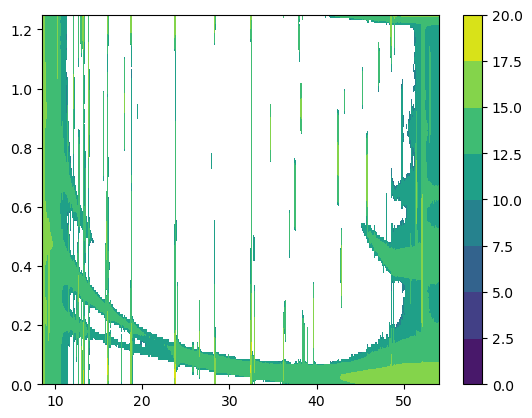

In [23]:
plot.visualizer(chromato_obj=(chromato - np.mean(chromato), time_rn), mod_time=mod_time)

In [46]:
test = chromato
chromato_stack = [test]
for sigma in sigma_values:
    efikoef = gaussian_filter(test, sigma=sigma)
    chromato_stack.append(efikoef)
    plot.visualizer(chromato_obj=(efikoef, time_rn), mod_time=mod_time)
chromato_stack = np.array(chromato_stack)

In [4]:
import re
path = "./data/NIST File to MGF/"
import write_masspec
import importlib
importlib.reload(write_masspec)


<module 'write_masspec' from 'c:\\Users\\33631\\Desktop\\stage\\pic\\write_masspec.py'>

In [4]:
import multiprocessing

In [7]:
cpu_count = multiprocessing.cpu_count()
print(cpu_count)

8


# Refacto verif

In [2]:
filename = "data/G0-1-250123.cdf"
mod_time = 1.25
chromato_obj = read_chroma.read_chroma(filename, mod_time)
chromato,time_rn,spectra_obj = chromato_obj
full_spectra = mass_spec.read_full_spectra(spectra_obj=spectra_obj)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

In [3]:
spectra, debuts, fins = full_spectra

In [4]:
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)

0
461


In [5]:
import importlib
importlib.reload(mass_spec)
importlib.reload(read_chroma)
importlib.reload(plot)
importlib.reload(benchmark)
importlib.reload(peak_detection)
importlib.reload(utils)
importlib.reload(matching)

<module 'matching' from 'c:\\Users\\33631\\Desktop\\stage\\pic\\matching.py'>

## PLM

Peak detection avant

In [7]:
importlib.reload(peak_detection)
u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.1, mode="mass_per_mass", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.024))
r=None

c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [8]:
len(u)

102

In [9]:
u

array([[   2,   63],
       [   3,   66],
       [ 173,  117],
       [ 229,    2],
       [ 257,  113],
       [ 362,    7],
       [ 492,    6],
       [ 734,    4],
       [ 952,    4],
       [1027,  103],
       [1150,    6],
       [1154,   15],
       [1171,   17],
       [1331,   12],
       [1497,   24],
       [1631,   91],
       [1650,   46],
       [1728,    2],
       [1738,    2],
       [1746,    2],
       [1758,    2],
       [1774,    2],
       [1783,    2],
       [1792,   82],
       [1806,    2],
       [1811,    2],
       [1818,    2],
       [1822,    2],
       [1827,    2],
       [1835,    2],
       [1839,    2],
       [1849,    2],
       [1863,    2],
       [1880,    2],
       [1888,    2],
       [1894,    2],
       [1912,    2],
       [1922,    2],
       [1924,  148],
       [1931,    2],
       [1943,    2],
       [1950,    2],
       [1955,    2],
       [1967,    2],
       [1990,    2],
       [1999,    2],
       [2007,    2],
       [2024,

Peak detection après

In [399]:
importlib.reload(peak_detection)
u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.1, mode="mass_per_mass", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.024))
r=None

(244, 3)


c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [400]:
len(u)

102

In [401]:
u

array([[   2,   63],
       [   3,   66],
       [ 173,  117],
       [ 229,    2],
       [ 257,  113],
       [ 362,    7],
       [ 492,    6],
       [ 734,    4],
       [ 952,    4],
       [1027,  103],
       [1150,    6],
       [1154,   15],
       [1171,   17],
       [1331,   12],
       [1497,   24],
       [1631,   91],
       [1650,   46],
       [1728,    2],
       [1738,    2],
       [1746,    2],
       [1758,    2],
       [1774,    2],
       [1783,    2],
       [1792,   82],
       [1806,    2],
       [1811,    2],
       [1818,    2],
       [1822,    2],
       [1827,    2],
       [1835,    2],
       [1839,    2],
       [1849,    2],
       [1863,    2],
       [1880,    2],
       [1888,    2],
       [1894,    2],
       [1912,    2],
       [1922,    2],
       [1924,  148],
       [1931,    2],
       [1943,    2],
       [1950,    2],
       [1955,    2],
       [1967,    2],
       [1990,    2],
       [1999,    2],
       [2007,    2],
       [2024,

Benchmark avant PLM

In [403]:
importlib.reload(benchmark)
seuil = [0.4, 0.45, 0.5]
peak_local_max_params = {"filters": [],"min_distance":[1],"seuil": seuil, "abs_t": [0.024]}
params = {"peak_local_max": peak_local_max_params}
benchmark.benchmark("data/G0-1-250123.cdf", mod_time=1.25, spectrum_path = "./myspectra.mgf",lib_path = "./my_lib.mgf", params=params, benchmark_filename='./avant_refacto.json', mode='mass_per_mass', cluster=True)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)
c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


0.45
(210, 3)
86


c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)
c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


0.5
(206, 3)
83


c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)
c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


Benchmark après PLM

In [11]:
importlib.reload(benchmark)
importlib.reload(peak_detection)
seuil = [0.4, 0.45, 0.5]
peak_local_max_params = {"filters": [],"min_distance":[1],"seuil": seuil, "abs_t": [0.024]}
params = {"peak_local_max": peak_local_max_params}
benchmark.benchmark("data/G0-1-250123.cdf", mod_time=1.25, spectrum_path = "./myspectra.mgf",lib_path = "./my_lib.mgf", params=params, benchmark_filename='./apres_refacto.json', mode='mass_per_mass', cluster=True)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)
c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))
c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

shape=
(86, 2)


c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))
c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


shape=
(83, 2)


c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


## DoG

In [12]:
importlib.reload(peak_detection)
u = peak_detection.DoG(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.4, mode="mass_per_mass", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.024))
r=None

392


c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [17]:
len(u[0])

392

In [14]:
u

(array([[   0,    0],
        [   0,   24],
        [   0,   29],
        [   0,   61],
        [   0,   83],
        [   0,   97],
        [   0,  101],
        [   0,  105],
        [   0,  115],
        [   0,  120],
        [   0,  141],
        [   0,  149],
        [   7,  129],
        [   7,  133],
        [   7,  141],
        [   9,   64],
        [  12,  149],
        [  13,    9],
        [  22,   55],
        [  22,  110],
        [  26,   61],
        [  26,  109],
        [  32,  107],
        [  35,  106],
        [  36,   57],
        [  36,  120],
        [  39,   59],
        [  39,   39],
        [  39,   46],
        [  43,  104],
        [  48,   92],
        [  48,   96],
        [  50,  102],
        [  52,   58],
        [  55,   57],
        [  65,   98],
        [  66,   56],
        [  69,  136],
        [  70,    0],
        [  77,   95],
        [  81,   54],
        [  85,   93],
        [  87,  136],
        [  88,    0],
        [  88,   53],
        [ 

In [18]:
importlib.reload(peak_detection)
u = peak_detection.DoG(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.4, mode="mass_per_mass", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.024))
r=None

392


c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [19]:
len(u[0])

392

In [20]:
u

(array([[   0,    0],
        [   0,   24],
        [   0,   29],
        [   0,   61],
        [   0,   83],
        [   0,   97],
        [   0,  101],
        [   0,  105],
        [   0,  115],
        [   0,  120],
        [   0,  141],
        [   0,  149],
        [   7,  129],
        [   7,  133],
        [   7,  141],
        [   9,   64],
        [  12,  149],
        [  13,    9],
        [  22,   55],
        [  22,  110],
        [  26,   61],
        [  26,  109],
        [  32,  107],
        [  35,  106],
        [  36,   57],
        [  36,  120],
        [  39,   59],
        [  39,   39],
        [  39,   46],
        [  43,  104],
        [  48,   92],
        [  48,   96],
        [  50,  102],
        [  52,   58],
        [  55,   57],
        [  65,   98],
        [  66,   56],
        [  69,  136],
        [  70,    0],
        [  77,   95],
        [  81,   54],
        [  85,   93],
        [  87,  136],
        [  88,    0],
        [  88,   53],
        [ 

Avant mutliprocess

In [47]:
importlib.reload(peak_detection)
u = peak_detection.DoG(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.3, mode="mass_per_mass", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.020))
r=None

19


In [48]:
len(u[0])

19

In [49]:
u

(array([[ 228,  149],
        [ 229,    2],
        [ 361,  149],
        [ 362,    7],
        [ 491,  149],
        [ 492,    6],
        [ 733,  149],
        [ 734,    4],
        [ 951,  149],
        [ 952,    4],
        [1149,  149],
        [1150,    6],
        [1154,   14],
        [2012,    0],
        [2038,    0],
        [2070,    0],
        [2103,    0],
        [2135,    0],
        [2186,    0]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9]))

Multiprocessing

In [55]:
importlib.reload(peak_detection)
u = peak_detection.DoG(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.3, mode="mass_per_mass", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.))
r=None

8
651


c:\Users\33631\Desktop\stage\pic\peak_detection.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


In [56]:
len(u[0])

651

In [57]:
u

(array([[   0,    0],
        [   0,    8],
        [   0,   24],
        ...,
        [2186,   77],
        [2186,  149],
        [2186,  102]]),
 array([14,  9,  9,  9,  3, 14,  5,  9,  9,  9,  9, 14, 37,  9, 14,  1,  1,
         1,  5,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5,  5,  9,  1,  5,  1,
         1,  5,  5,  1,  5,  5,  5,  5,  5,  1,  1,  5,  5,  5,  1,  1,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  1,  5,
         5,  5,  5,  5,  5,  5,  5,  1,  5,  5,  5,  5,  5,  5,  1,  1,  1,
         5,  1,  5,  1,  1,  1,  1,  1,  5,  5,  1,  5,  5,  5,  1,  5,  1,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  1,  1,  5,  5,  5,  5,  5,  5,
         3,  1,  5,  3,  1,  3,  1,  1,  1,  3,  5,  5,  1,  5,  1,  3,  3,
         3,  3,  1,  1,  1,  3,  3,  3,  1,  1,  3,  3,  3,  1,  1,  3,  3,
         3,  3,  3,  1,  3,  1,  3,  3,  3,  3,  3,  3,  1,  3,  3,  3,  3,
         3,  1,  3,  3,  3,  3,  3,  3,  3,  1,  3,  3,  3,  1,  1,  2,  3,
         3,  1,  

In [58]:
v = projection.matrix_to_chromato(u[0], time_rn=time_rn, mod_time=mod_time,chromato_dim= chromato.shape)

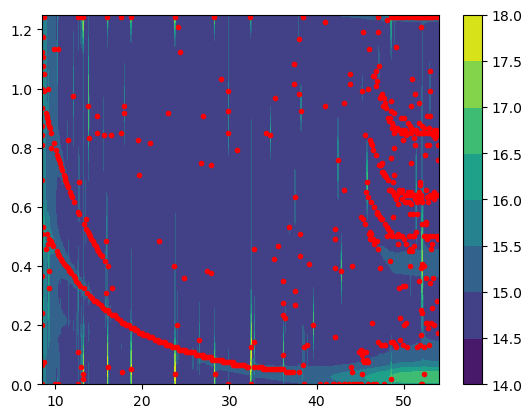

In [59]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=v)

Benchmark avant

In [21]:
importlib.reload(benchmark)
seuil = [0.4, 0.5]
dog_params = {"filters": [], "sigma_ratio": [1.6], "seuil": seuil, "abs_t": [0.024]}
params = {"DoG":dog_params}
benchmark.benchmark("data/G0-1-250123.cdf", mod_time=1.25, spectrum_path = "./myspectra.mgf",lib_path = "./my_lib.mgf", params=params, benchmark_filename='./avant_refacto_dog.json', mode='mass_per_mass', cluster=True)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


392
392


c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


0.5


c:\Users\33631\Desktop\stage\pic\peak_detection.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


392
392


c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


Benchmark après

In [28]:
importlib.reload(benchmark)
importlib.reload(peak_detection)
seuil = [0.4, 0.5]
dog_params = {"filters": [], "sigma_ratio": [1.6], "seuil": seuil, "abs_t": [0.024]}
params = {"DoG":dog_params}
benchmark.benchmark("data/G0-1-250123.cdf", mod_time=1.25, spectrum_path = "./myspectra.mgf",lib_path = "./my_lib.mgf", params=params, benchmark_filename='./apres_refacto_dog.json', mode='mass_per_mass', cluster=True)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))
c:\Users\33631\Desktop\stage\pic\matching.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  found_present = check_match(match=np.array(match))


# Test score avec seulement les 12 FAME dans la lib

In [3]:
filename = "data/G0-1-250123.cdf"
mod_time = 1.25
chromato_obj = read_chroma.read_chroma(filename, mod_time)
chromato,time_rn,spectra_obj = chromato_obj
full_spectra = mass_spec.read_full_spectra(spectra_obj=spectra_obj)
spectra, debuts, fins = full_spectra
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dataset_completeness: C1+C2
    ms_template_revision: 1.0.1
    netcdf_revision: 3.6.3
    languages: English
    netcdf_file_date_time_stamp: 20230126090338+0100
    experiment_date_time_stamp: 20230125120639+0100
    experiment_type: Centroided Mass Spectrum
    sample_state: Other State
    test_separation_type: Gas-Liquid Chromatography
    test_ms_inlet: Capillary Direct
    test_ionization_mode: Electron Impact
    test_ionization_polarity: Positive Polarity
    test_detector_type: Electron Multiplier
    test_resolution_type: Constant Resolution
    test_scan_function: Mass Scan
    test_scan_direction: Up
    test_scan_law: Linear
    raw_data_mass_format: Short
    raw_data_time_format: Short
    raw_data_intensity_format: Float
    units: Seconds
    starting_scan_number: 0
    dimensions(sizes): _2_byte_string(2), _4_byte_string(4), _8_byte_string(8), _16_byte_string(16), _32

In [67]:
import importlib
importlib.reload(mass_spec)
importlib.reload(read_chroma)
importlib.reload(plot)
importlib.reload(benchmark)
importlib.reload(peak_detection)
importlib.reload(utils)
importlib.reload(matching)

<module 'matching' from 'c:\\Users\\Stan\\pic\\matching.py'>

In [5]:
importlib.reload(peak_detection)
u = peak_detection.plm(chromato_obj=(chromato, time_rn), mod_time=mod_time, seuil=0.3, mode="tic", chromato_cube=(chromato_cube), cluster=True, threshold_abs=(0.0))
r=None

In [6]:
len(u)

83

In [7]:
chromato_cd = projection.matrix_to_chromato(u,time_rn, mod_time,chromato.shape)

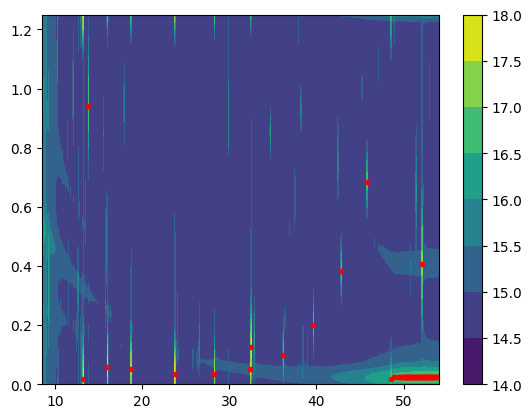

In [8]:
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=chromato_cd)

In [9]:
spectrum_path = "./myspectra.mgf"

In [10]:
lib_path = "./FAME_verif.mgf"

In [11]:
lib_path = "./data/NIST_from_mssearch.mgf"

In [12]:
spectrum_lib = list(load_from_mgf(lib_path, metadata_harmonization=False))
importlib.reload(mass_spec)
matches = matching.matching(chromato_obj, spectra, spectrum_path,
                    spectrum_lib, u, mod_time=mod_time, min_score = 0.7)

[(<matchms.Spectrum.Spectrum object at 0x0000000005D20520>, (0.98880375, 84)), (<matchms.Spectrum.Spectrum object at 0x0000000032912D60>, (0.95142932, 84)), (<matchms.Spectrum.Spectrum object at 0x000000000AC3FBE0>, (0.94605425, 79)), (<matchms.Spectrum.Spectrum object at 0x0000000030FD1520>, (0.93906265, 70)), (<matchms.Spectrum.Spectrum object at 0x00000000329174F0>, (0.93456063, 112)), (<matchms.Spectrum.Spectrum object at 0x00000000328F9C70>, (0.90272275, 134)), (<matchms.Spectrum.Spectrum object at 0x00000000329170A0>, (0.84938849, 151)), (<matchms.Spectrum.Spectrum object at 0x0000000032917430>, (0.82102813, 137)), (<matchms.Spectrum.Spectrum object at 0x0000000032912E80>, (0.80835731, 177)), (<matchms.Spectrum.Spectrum object at 0x00000000328F96A0>, (0.72501796, 200)), (<matchms.Spectrum.Spectrum object at 0x00000000328F9700>, (0.61071378, 144)), (<matchms.Spectrum.Spectrum object at 0x0000000005D1BBB0>, (0.39338965, 265))]
[(<matchms.Spectrum.Spectrum object at 0x0000000030FD15

In [13]:
matches

[[[23.77, 0.03],
  {'casno': '111-82-0', 'compound_name': 'Dodecanoic acid, methyl ester'},
  (0.98880375, 84),
  {'casno': '110-42-9', 'compound_name': 'Decanoic acid, methyl ester'},
  (0.95142932, 84),
  {'casno': '1731-84-6', 'compound_name': 'Nonanoic acid, methyl ester'},
  (0.94605425, 79)],
 [[13.26, 0.02],
  {'casno': '111-11-5', 'compound_name': 'Octanoic acid, methyl ester'},
  (0.98056573, 70),
  {'casno': '111-82-0', 'compound_name': 'Dodecanoic acid, methyl ester'},
  (0.93592795, 84),
  {'casno': '1731-84-6', 'compound_name': 'Nonanoic acid, methyl ester'},
  (0.91548272, 79)],
 [[16.03, 0.06],
  {'casno': '1731-84-6', 'compound_name': 'Nonanoic acid, methyl ester'},
  (0.96799451, 79),
  {'casno': '111-82-0', 'compound_name': 'Dodecanoic acid, methyl ester'},
  (0.95509392, 84),
  {'casno': '111-11-5', 'compound_name': 'Octanoic acid, methyl ester'},
  (0.95000755, 70)],
 [[32.43, 0.05],
  {'casno': '112-39-0', 'compound_name': 'Hexadecanoic acid, methyl ester'},
  (0.9

c:\Users\Stan\pic\plot.py:110: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:110: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


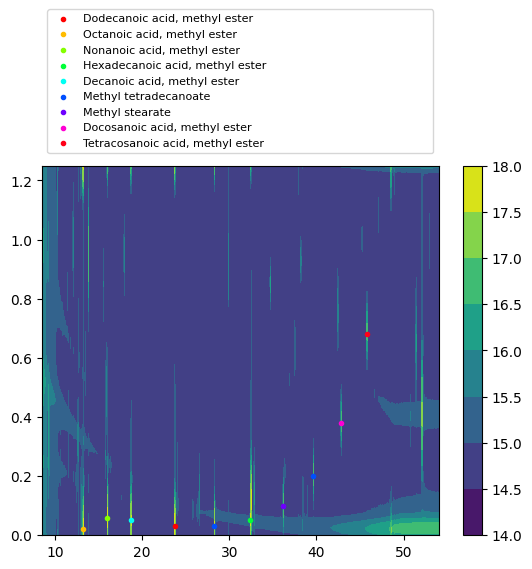

In [14]:
importlib.reload(plot)
casnos_dict = (utils.get_name_dict(matches))
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=chromato_cd, casnos_dict=casnos_dict)

In [15]:
u

array([[ 734,    4],
       [ 229,    2],
       [ 362,    7],
       [1154,   15],
       [1150,    6],
       [ 492,    6],
       [ 952,    4],
       [2095,   49],
       [1925,    2],
       [ 257,  113],
       [2098,    3],
       [2102,    3],
       [2106,    3],
       [2108,    3],
       [2113,    3],
       [2111,    3],
       [2116,    3],
       [2119,    3],
       [2122,    3],
       [2124,    3],
       [2132,    3],
       [2129,    3],
       [2139,    3],
       [2134,    3],
       [2136,    3],
       [2141,    3],
       [2148,    3],
       [2146,    3],
       [2150,    3],
       [2153,    3],
       [2160,    3],
       [2155,    3],
       [2164,    3],
       [2169,    3],
       [2175,    3],
       [2178,    3],
       [2172,    3],
       [2183,    3],
       [2066,    3],
       [1331,   12],
       [2073,    3],
       [2083,    3],
       [2076,    3],
       [2088,    3],
       [2070,    3],
       [2091,    3],
       [2063,    3],
       [2079,

In [16]:
chromato_cd

array([[2.37706439e+01, 3.33333333e-02],
       [1.32642745e+01, 1.66666667e-02],
       [1.60312985e+01, 5.83333333e-02],
       [3.25086145e+01, 1.25000000e-01],
       [3.24253958e+01, 5.00000000e-02],
       [1.87359084e+01, 5.00000000e-02],
       [2.83060668e+01, 3.33333333e-02],
       [5.20858297e+01, 4.08333333e-01],
       [4.85490320e+01, 1.66666667e-02],
       [1.38468058e+01, 9.41666667e-01],
       [5.21482437e+01, 2.50000000e-02],
       [5.22314625e+01, 2.50000000e-02],
       [5.23146813e+01, 2.50000000e-02],
       [5.23562907e+01, 2.50000000e-02],
       [5.24603141e+01, 2.50000000e-02],
       [5.24187047e+01, 2.50000000e-02],
       [5.25227282e+01, 2.50000000e-02],
       [5.25851423e+01, 2.50000000e-02],
       [5.26475564e+01, 2.50000000e-02],
       [5.26891657e+01, 2.50000000e-02],
       [5.28556033e+01, 2.50000000e-02],
       [5.27931892e+01, 2.50000000e-02],
       [5.30012361e+01, 2.50000000e-02],
       [5.28972127e+01, 2.50000000e-02],
       [5.293882

# Test pyms_nist_search

In [17]:
import pyms_nist_search
import pyms

In [18]:
search = pyms_nist_search.Engine(
                "C:/NIST14/MSSEARCH/mainlib/",
                pyms_nist_search.NISTMS_MAIN_LIB,
                "C:/Users/Stan/Test",
                )

In [55]:
mlist, ilist = mass_spec.read_spectrum(chromato, [492, 6], spectra)

In [57]:
mass_spectrum = pyms.Spectrum.MassSpectrum(mlist, ilist)

In [58]:
res = search.full_search_with_ref_data(mass_spectrum)

In [65]:
res[0][0].cas

'110-42-9'

In [88]:
importlib.reload(matching)
matches = matching.matching_nist_lib(chromato_obj=chromato_obj, spectra=spectra, coordinates=u)

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Caprylic acid, �-methyl-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Stearic acid, �-methyl-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\pic\matching.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  def matching(chromato_obj, spectra, spectrum_path, spectrum_lib, coordinates, mod_time=1.25

In [89]:
matches

array([[list([23.77, 0.03]),
        {'casno': '111-82-0', 'compound_name': 'Dodecanoic acid, methyl ester'}],
       [list([13.26, 0.02]),
        {'casno': '111-11-5', 'compound_name': 'Octanoic acid, methyl ester'}],
       [list([16.03, 0.06]),
        {'casno': '1731-84-6', 'compound_name': 'Nonanoic acid, methyl ester'}],
       [list([32.51, 0.12]),
        {'casno': '---', 'compound_name': '6-Methoxy-1H-1,2,3-benzotriazole-5-carboxylic acid, 2TMS'}],
       [list([32.43, 0.05]),
        {'casno': '112-39-0', 'compound_name': 'Hexadecanoic acid, methyl ester'}],
       [list([18.74, 0.05]),
        {'casno': '110-42-9', 'compound_name': 'Decanoic acid, methyl ester'}],
       [list([28.31, 0.03]),
        {'casno': '124-10-7', 'compound_name': 'Methyl tetradecanoate'}],
       [list([52.09, 0.41]),
        {'casno': '---', 'compound_name': '17-(Furan-3-yl)-3-hydroxy-4,4,8-trimethyl-16-oxo-14,15-epoxyandrostane-1,7-diyl diacetate, TMS derivative'}],
       [list([48.55, 0.02]),
 

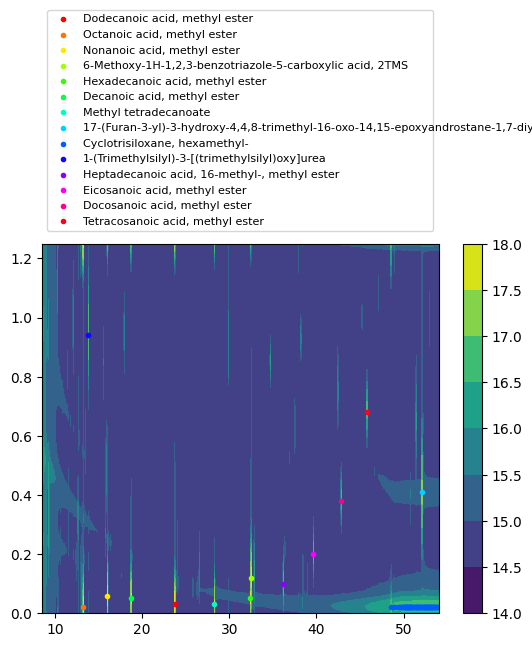

In [91]:
importlib.reload(utils)
casnos_dict = (utils.get_name_dict(matches))
plot.visualizer(chromato_obj=(chromato, time_rn), mod_time=mod_time, points=chromato_cd, casnos_dict=casnos_dict)

# Comparaison mn et centroid

In [2]:
filename = "data/G0-1-250123.cdf"
mod_time = 1.25
chromato_obj = read_chroma.read_chroma(filename, mod_time)
chromato,time_rn,spectra_obj = chromato_obj

In [4]:
full_from_read_full_spectra = mass_spec.read_full_spectra(spectra_obj=spectra_obj)
spectra_from_full_spectra, debuts, fins = full_from_read_full_spectra
chromato_cube_from_full_spectra = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_from_read_full_spectra, spectra_obj=spectra_obj)

(328125, 2)
--- 58.097322940826416 seconds --- to compute full spectra


In [5]:
spectra_from_read_spectra, debuts, fins = mass_spec.read_spectra(spectra_obj)

150
2187
328125
--- 11.61566424369812 seconds --- to compute spectra


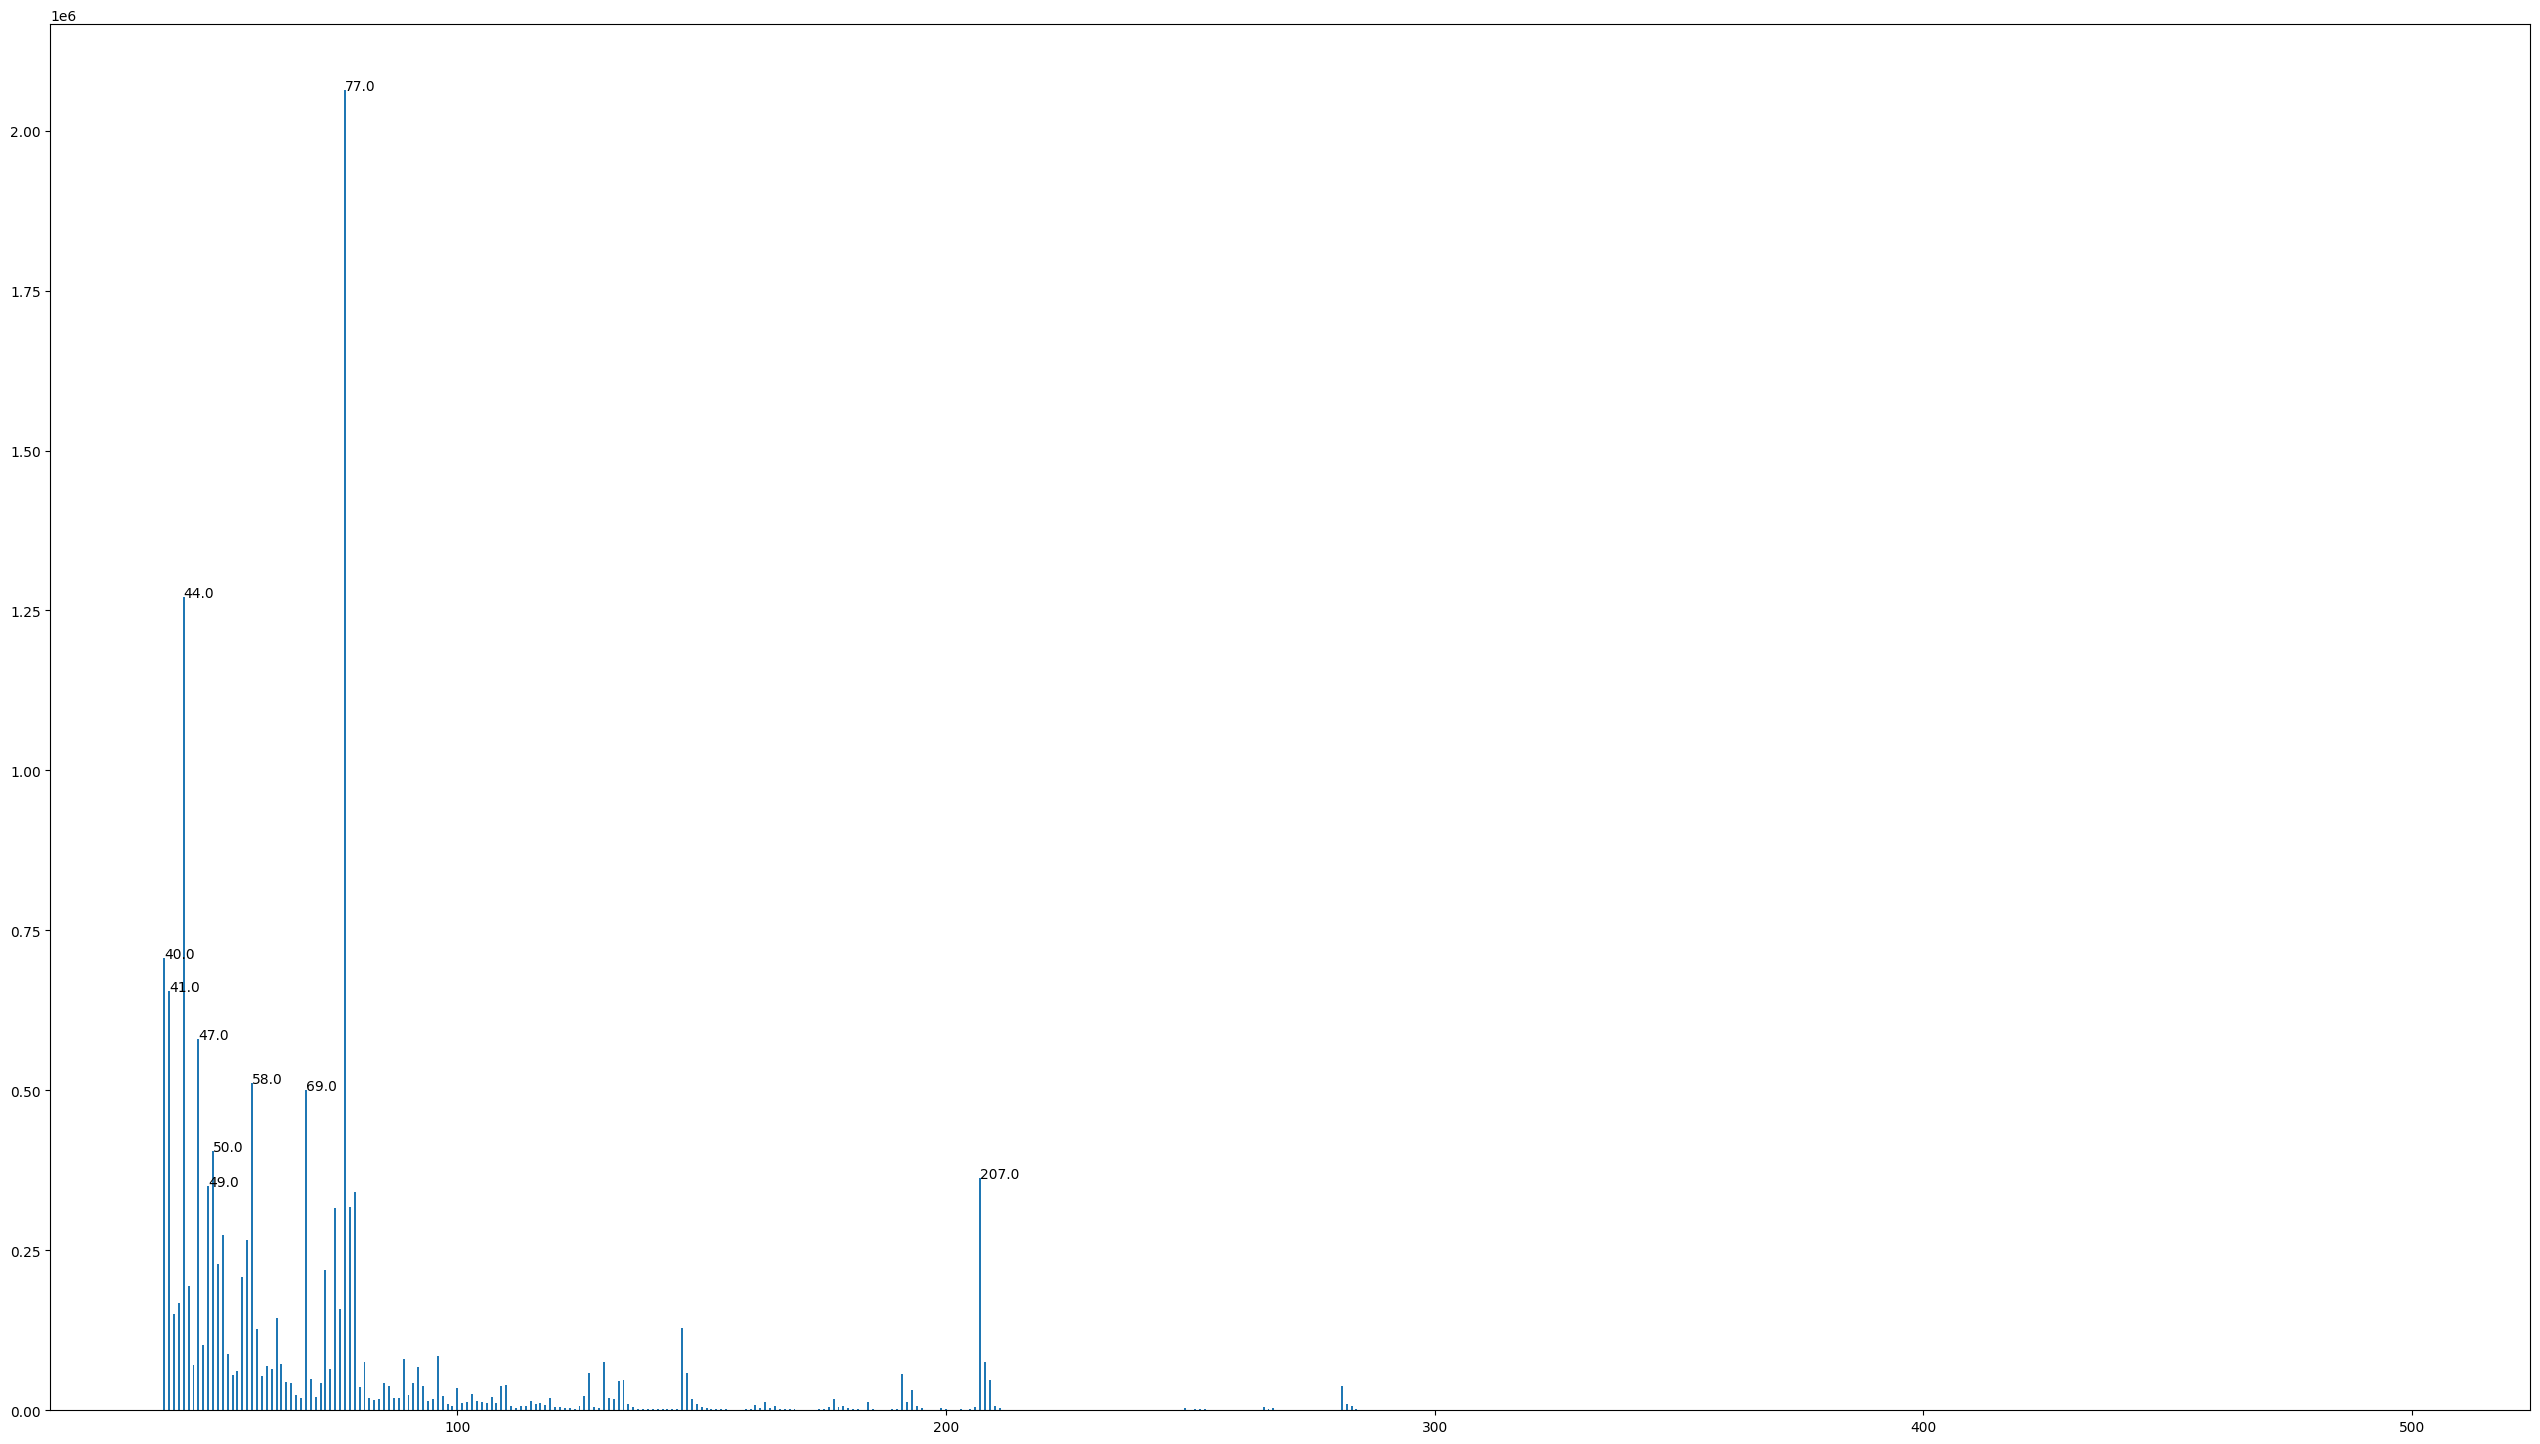

In [6]:
plot.plot_mass(spectra_from_full_spectra[100][0], spectra_from_full_spectra[100][1])

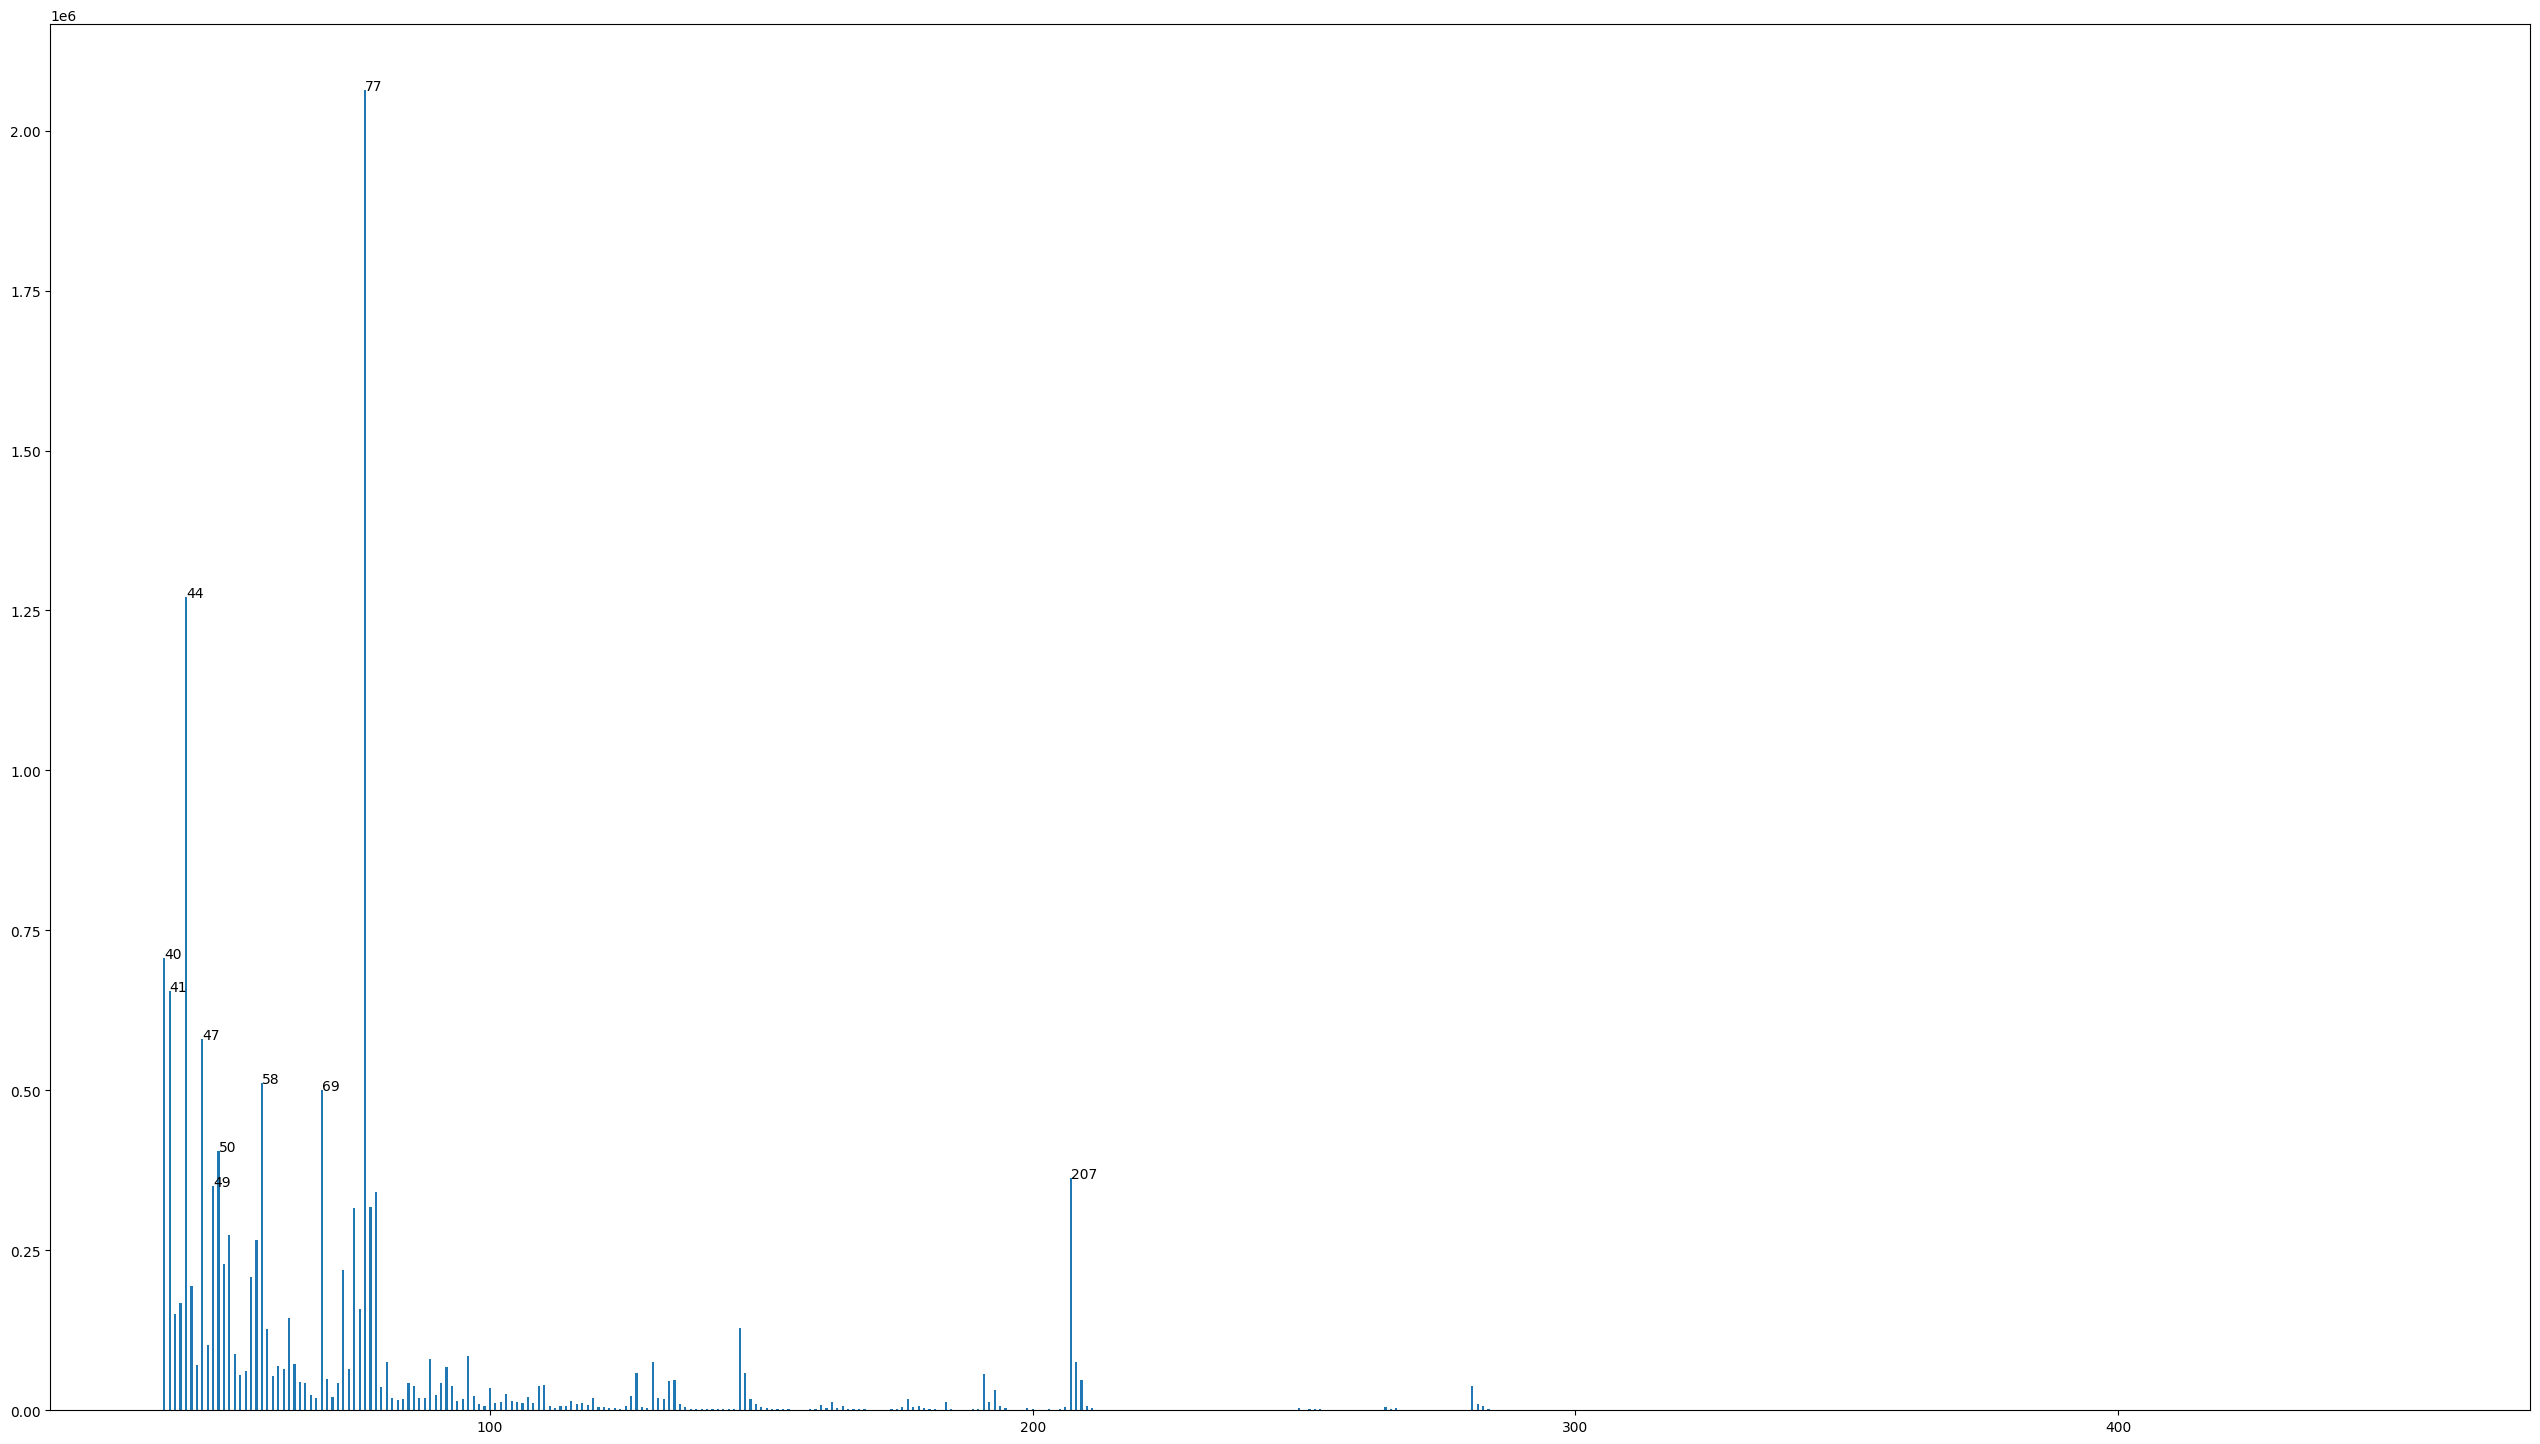

In [7]:
plot.plot_mass(spectra_from_read_spectra[100][0], spectra_from_read_spectra[100][1])

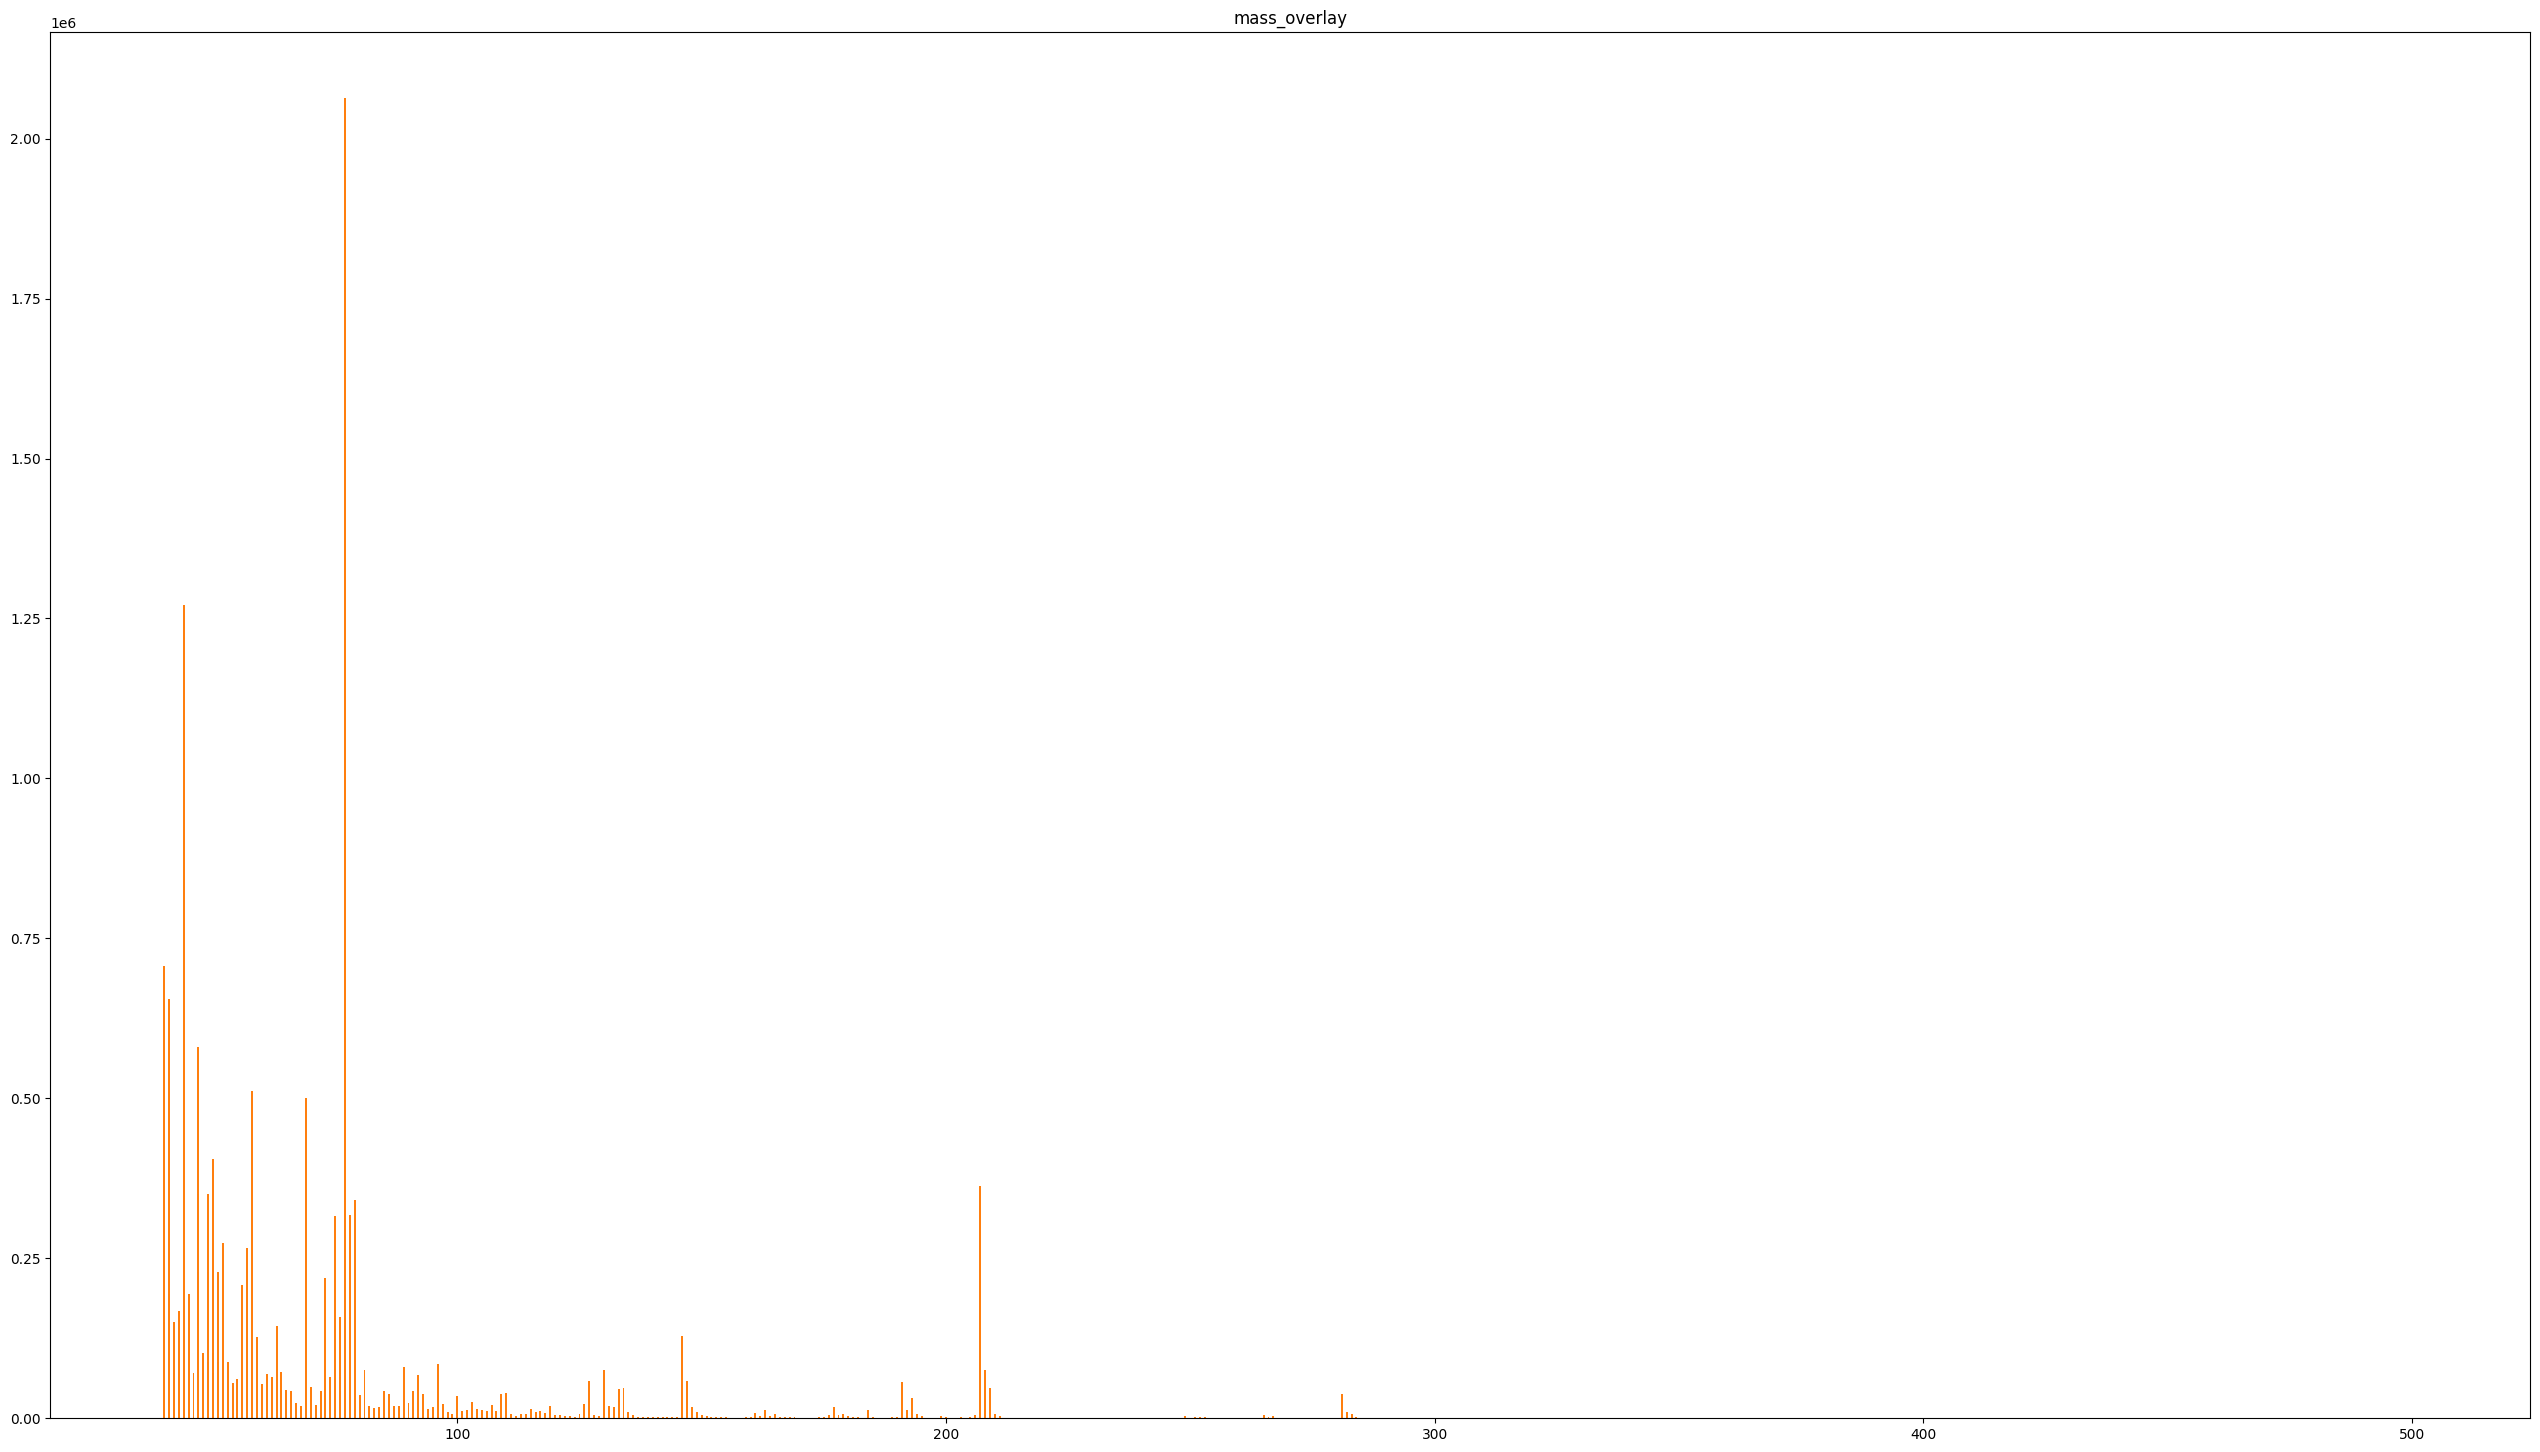

In [8]:
plot.mass_overlay([spectra_from_full_spectra[100][0],spectra_from_read_spectra[100][0]], [spectra_from_full_spectra[100][1], spectra_from_read_spectra[100][1]])

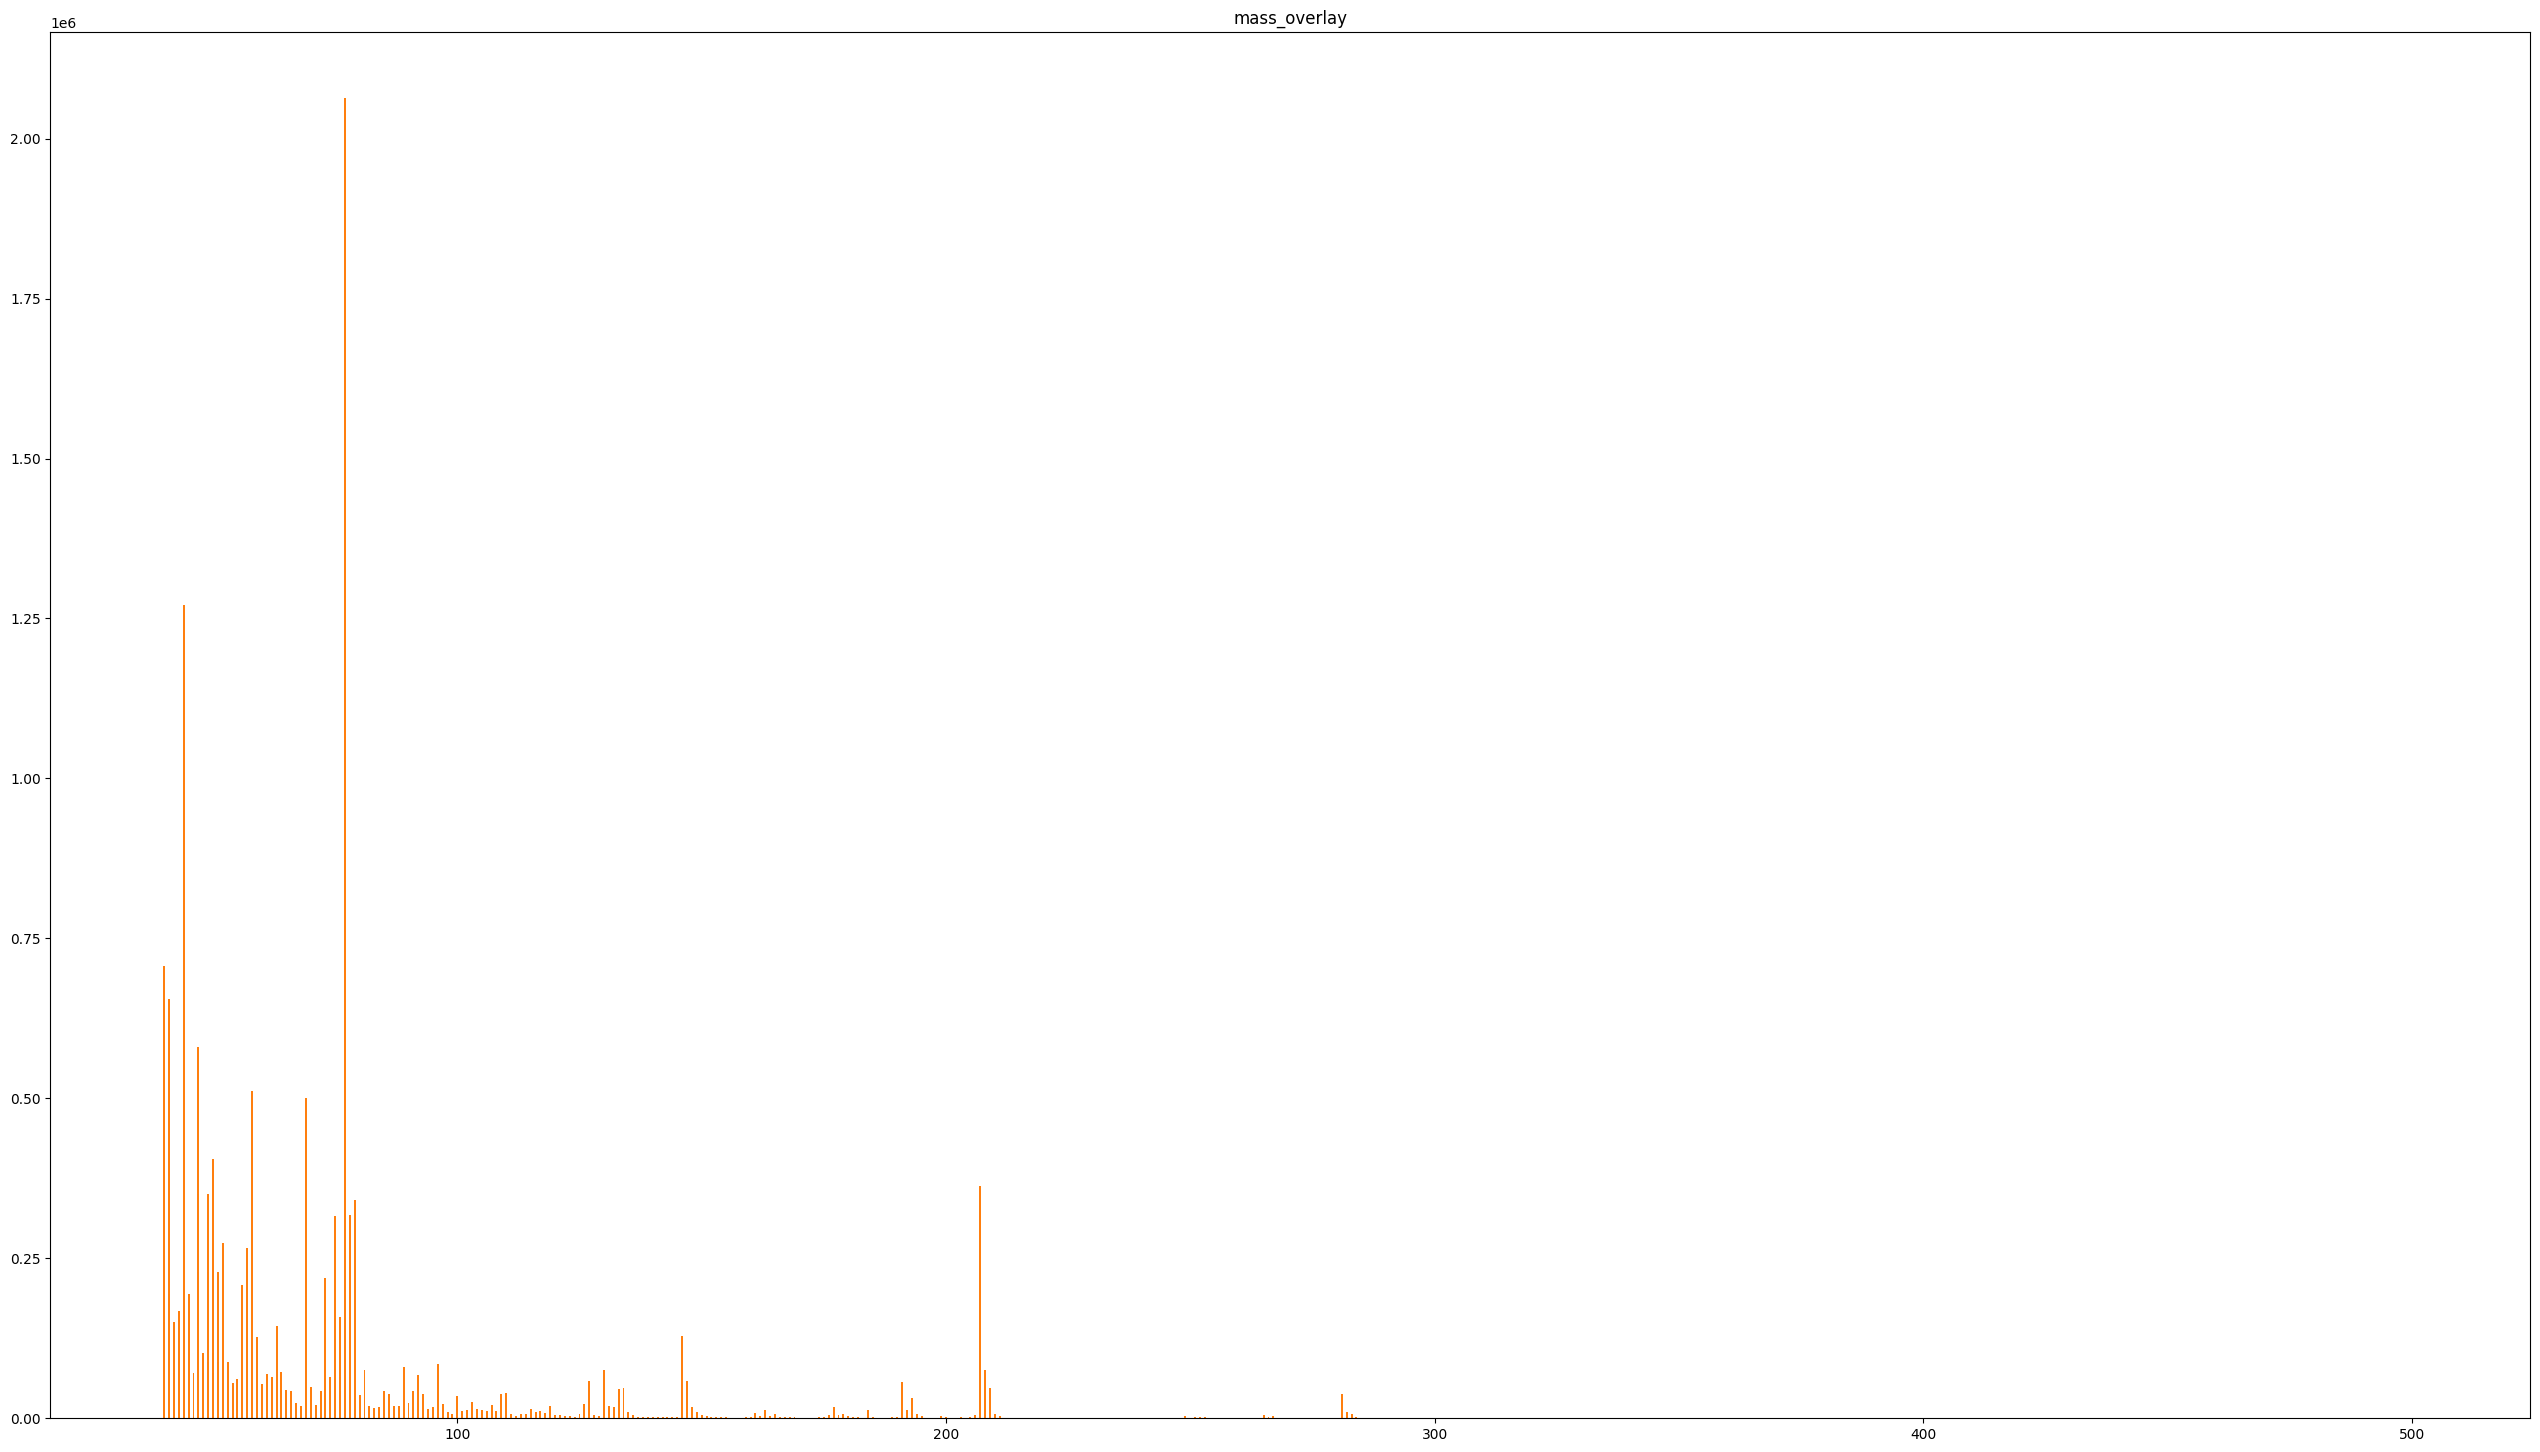

In [9]:
plot.mass_overlay([spectra_from_read_spectra[100][0], spectra_from_full_spectra[100][0]], [spectra_from_read_spectra[100][1], spectra_from_full_spectra[100][1]])

In [262]:
coord,r = peak_detection.DoH((chromato,time_rn), 1.25, seuil = 0.05)

In [263]:
coord

array([[1152,    0],
       [ 735,    0],
       [ 230,  144],
       [   0,  134],
       [2171,   15],
       [   1,   56],
       [2106,    0],
       [2171,  134],
       [ 374,    0],
       [1136,   35],
       [ 723,   24],
       [2135,   44],
       [1174,    0],
       [ 215,    0],
       [ 942,   21],
       [  55,   39],
       [  53,    0],
       [ 732,  134],
       [ 270,  120],
       [2171,   58],
       [1162,  134],
       [  52,   81],
       [ 511,    0],
       [1936,  134],
       [1932,   15],
       [ 964,  134],
       [ 353,  134],
       [1330,   15],
       [2046,   41],
       [1490,   15],
       [1647,    0],
       [ 475,   41],
       [1178,   42],
       [ 443,  132],
       [ 337,   46],
       [1988,   15],
       [ 516,   38],
       [1800,   73],
       [ 867,   16],
       [1748,   35],
       [1019,  129],
       [1442,    0],
       [ 759,   35],
       [1715,   40],
       [1342,  134],
       [2124,  134],
       [  94,  119],
       [1867,

In [264]:
coord_in_chromato = projection.matrix_to_chromato(coord, time_rn, 1.25, chromato.shape)

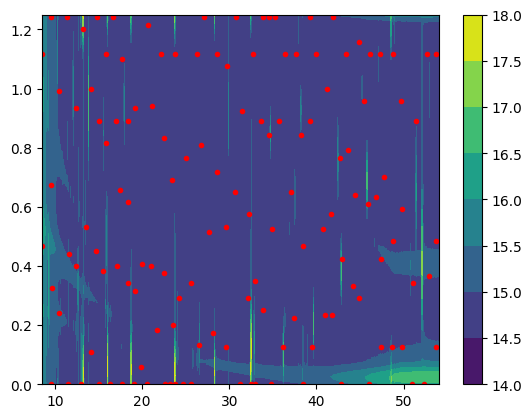

In [265]:
plot.visualizer((chromato, time_rn), 1.25, points=coord_in_chromato)

In [266]:
metrics_from_full_spectra = matching.compute_metrics(coord, chromato_obj, spectra_from_full_spectra,"", "", 1.25)

In [267]:
metrics_from_read_spectra = matching.compute_metrics(coord, chromato_obj, spectra_from_read_spectra,"", "", 1.25)

In [268]:
metrics_from_full_spectra

[140, 0.16666666666666666, 0.014285714285714285, 2]

In [269]:
metrics_from_read_spectra

[140, 0.16666666666666666, 0.014285714285714285, 2]

In [271]:
coord,r = peak_detection.DoH((chromato,time_rn), 1.25, seuil= 0.001)

In [272]:
metrics_from_full_spectra = matching.compute_metrics(coord, chromato_obj, spectra_from_full_spectra,"", "", 1.25)

In [273]:
metrics_from_full_spectra

[140, 0.16666666666666666, 0.014285714285714285, 2]

In [260]:
coord_in_chromato = projection.matrix_to_chromato(coord, time_rn, 1.25, chromato.shape)

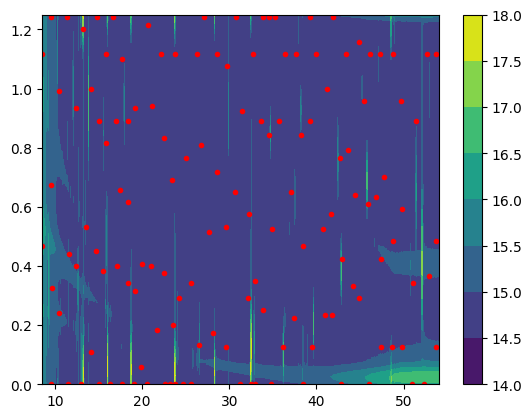

In [261]:
plot.visualizer((chromato, time_rn), 1.25, points=coord_in_chromato)

Comparaison seuil avant ou apres

In [205]:
importlib.reload(peak_detection)

<module 'peak_detection' from 'c:\\Users\\Stan\\pic\\peak_detection.py'>

In [248]:
SEUILS = [0.0001, 0.0001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
max_peak_val = np.max(chromato)
coord,r = peak_detection.DoG((chromato,time_rn), 1.25, seuil= SEUILS[0], threshold_abs=0.01)
for i in range(len(SEUILS)):
    print(SEUILS[i])
    coordinates = np.array(
        [[x, y] for x, y in coord if chromato[x, y] > SEUILS[i] * max_peak_val])
    print(matching.compute_metrics(coordinates, chromato_obj, spectra_from_full_spectra,"", "", 1.25))

0.0001
[92, 0.9166666666666666, 0.17391304347826086, 16]
0.0001
[92, 0.9166666666666666, 0.17391304347826086, 16]
0.01
[92, 0.9166666666666666, 0.17391304347826086, 16]
0.05
[79, 0.9166666666666666, 0.20253164556962025, 16]
0.1
[45, 0.9166666666666666, 0.35555555555555557, 16]
0.15
[30, 0.8333333333333334, 0.4666666666666667, 14]
0.2
[24, 0.75, 0.5416666666666666, 13]
0.3
[14, 0.6666666666666666, 0.8571428571428571, 12]
0.4
[7, 0.4166666666666667, 0.8571428571428571, 6]
0.5
[5, 0.25, 0.8, 4]


In [223]:
SEUILS = [0.2, 0.3, 0.4, 0.5]
max_peak_val = np.max(chromato)
coord,r = peak_detection.DoH((chromato,time_rn), 1.25, seuil= SEUILS[0], threshold_abs=0.001)
for i in range(len(SEUILS)):
    print(SEUILS[i])
    coordinates = np.array(
        [[x, y] for x, y in coord if chromato[x, y] > SEUILS[i] * max_peak_val])
    print(matching.compute_metrics(coordinates, chromato_obj, spectra_from_full_spectra,"", "", 1.25))

0.2
[6, 0.08333333333333333, 0.16666666666666666, 1]
0.3
[1, 0.08333333333333333, 1.0, 1]
0.4
[0, 0, 0, 0]
0.5
[0, 0, 0, 0]
